In [24]:
import pandas as pd
import numpy as np

In [6]:
counts = pd.read_csv('data/severity_study/GSE147507_RawReadCounts_Human.tsv',sep='\t',index_col=0) 
length = pd.read_csv('data/severity_study/genes_length.csv',sep=',',index_col=0) 

In [7]:
length.head()

,SYMBOL,GENEID,len
1,DDX11L1,ENSG00000223972,1735
2,WASH7P,ENSG00000226210,1817
3,WASH7P,ENSG00000227232,1351
4,WASH7P,ENSG00000262435,1817
5,FAM138A,ENSG00000237613,1219


In [8]:
counts.head()

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,Series2_A549_Mock_1,Series2_A549_Mock_2,Series2_A549_Mock_3,Series2_A549_SARS-CoV-2_1,...,Series15_COVID19Lung_1,Series16_A549-ACE2_Mock_1,Series16_A549-ACE2_Mock_2,Series16_A549-ACE2_Mock_3,Series16_A549-ACE2_SARS-CoV-2_1,Series16_A549-ACE2_SARS-CoV-2_2,Series16_A549-ACE2_SARS-CoV-2_3,Series16_A549-ACE2_SARS-CoV-2_Rux_1,Series16_A549-ACE2_SARS-CoV-2_Rux_2,Series16_A549-ACE2_SARS-CoV-2_Rux_3
DDX11L1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WASH7P,29,24,23,34,19,44,68,43,33,65,...,0,0,11,7,2,6,5,12,6,8
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
pd.DataFrame(counts.columns)[-5:]

,0
73,Series16_A549-ACE2_SARS-CoV-2_2
74,Series16_A549-ACE2_SARS-CoV-2_3
75,Series16_A549-ACE2_SARS-CoV-2_Rux_1
76,Series16_A549-ACE2_SARS-CoV-2_Rux_2
77,Series16_A549-ACE2_SARS-CoV-2_Rux_3


In [10]:
length = length.drop_duplicates(subset=['SYMBOL'])

In [11]:
x = length.groupby(['SYMBOL'])['len'].mean()

In [12]:
x

SYMBOL
A1BG         3999
A1BG-AS1     3374
A1CF         9603
A2M          6384
A2M-AS1      2948
            ...  
ZYG11A       4694
ZYG11B       8206
ZYX          3267
ZZEF1       15888
ZZZ3         9008
Name: len, Length: 21568, dtype: int64

In [13]:
counts.shape

(21797, 78)

In [14]:
genes = length.SYMBOL
lst3 = [value for value in counts.index if value in genes.values]
counts = counts.loc[lst3,:]

In [15]:
counts.shape

(20851, 78)

In [16]:
counts.tail()

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,Series2_A549_Mock_1,Series2_A549_Mock_2,Series2_A549_Mock_3,Series2_A549_SARS-CoV-2_1,...,Series15_COVID19Lung_1,Series16_A549-ACE2_Mock_1,Series16_A549-ACE2_Mock_2,Series16_A549-ACE2_Mock_3,Series16_A549-ACE2_SARS-CoV-2_1,Series16_A549-ACE2_SARS-CoV-2_2,Series16_A549-ACE2_SARS-CoV-2_3,Series16_A549-ACE2_SARS-CoV-2_Rux_1,Series16_A549-ACE2_SARS-CoV-2_Rux_2,Series16_A549-ACE2_SARS-CoV-2_Rux_3
CDY1B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CDY1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CSPG4P1Y,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GOLGA2P3Y,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GOLGA2P2Y,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
length.tail()

,SYMBOL,GENEID,len
25210,CDY1B,ENSG00000172352,2675
25211,CDY1,ENSG00000172288,2625
25212,CSPG4P1Y,ENSG00000240450,795
25213,GOLGA2P3Y,ENSG00000172297,1653
25214,GOLGA2P2Y,ENSG00000239533,1506


In [18]:
#counts['len'] = length['len'].values

In [19]:
counts.head()

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,Series2_A549_Mock_1,Series2_A549_Mock_2,Series2_A549_Mock_3,Series2_A549_SARS-CoV-2_1,...,Series15_COVID19Lung_1,Series16_A549-ACE2_Mock_1,Series16_A549-ACE2_Mock_2,Series16_A549-ACE2_Mock_3,Series16_A549-ACE2_SARS-CoV-2_1,Series16_A549-ACE2_SARS-CoV-2_2,Series16_A549-ACE2_SARS-CoV-2_3,Series16_A549-ACE2_SARS-CoV-2_Rux_1,Series16_A549-ACE2_SARS-CoV-2_Rux_2,Series16_A549-ACE2_SARS-CoV-2_Rux_3
DDX11L1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WASH7P,29,24,23,34,19,44,68,43,33,65,...,0,0,11,7,2,6,5,12,6,8
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
def calculate_rpkm(counts,len_):
    sum_= np.sum(counts.values,0) #Total mapped reads per sample 
    normalized_by_depth = np.divide(counts,sum_)
    normalized_by_len = np.divide(normalized_by_depth.T,len_)
    rpkm  = normalized_by_len*10**9
    return rpkm

In [21]:
length

,SYMBOL,GENEID,len
1,DDX11L1,ENSG00000223972,1735
2,WASH7P,ENSG00000226210,1817
5,FAM138A,ENSG00000237613,1219
6,OR4F5,ENSG00000186092,2618
9,OR4F3,ENSG00000230178,995
...,...,...,...
25210,CDY1B,ENSG00000172352,2675
25211,CDY1,ENSG00000172288,2625
25212,CSPG4P1Y,ENSG00000240450,795
25213,GOLGA2P3Y,ENSG00000172297,1653


In [22]:
length.index= length.SYMBOL
length = length.loc[lst3,:]

In [25]:
rpkm = calculate_rpkm(counts,length['len'])

In [26]:
rpkm.shape

(78, 20851)

In [27]:
rpkm = rpkm.T

In [28]:
rpkm.head()

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,Series2_A549_Mock_1,Series2_A549_Mock_2,Series2_A549_Mock_3,Series2_A549_SARS-CoV-2_1,...,Series15_COVID19Lung_1,Series16_A549-ACE2_Mock_1,Series16_A549-ACE2_Mock_2,Series16_A549-ACE2_Mock_3,Series16_A549-ACE2_SARS-CoV-2_1,Series16_A549-ACE2_SARS-CoV-2_2,Series16_A549-ACE2_SARS-CoV-2_3,Series16_A549-ACE2_SARS-CoV-2_Rux_1,Series16_A549-ACE2_SARS-CoV-2_Rux_2,Series16_A549-ACE2_SARS-CoV-2_Rux_3
DDX11L1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
WASH7P,1.419095,1.289233,0.763253,1.83724,1.056917,0.826847,1.95627,2.21594,2.25467,1.464444,...,0.0,0.0,0.582988,0.458366,0.35774,0.993138,0.829595,1.464681,0.742496,1.32132
FAM138A,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
OR4F5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
OR4F3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000


In [30]:
rpkm.to_csv('data/severity_study/RPKM_3_all.csv')

In [ ]:
# Find correlation between some genes and phenotype

In [30]:
# Selecting phenotypes with COVID19 infection
cols = rpkm.columns
phenotypes = ['Series1','Series2','Series5','Series6','Series16','Series7']

#phenotypes = ['Series1','Series2','Series5','Series6','Series7','Series16']
phenotypes_idx = [x for x in cols if x.split('_')[0] in phenotypes] 
rpkm=  rpkm.loc[:, phenotypes_idx]

In [31]:
phenotypes_idx

['Series1_NHBE_Mock_1',
 'Series1_NHBE_Mock_2',
 'Series1_NHBE_Mock_3',
 'Series1_NHBE_SARS-CoV-2_1',
 'Series1_NHBE_SARS-CoV-2_2',
 'Series1_NHBE_SARS-CoV-2_3',
 'Series2_A549_Mock_1',
 'Series2_A549_Mock_2',
 'Series2_A549_Mock_3',
 'Series2_A549_SARS-CoV-2_1',
 'Series2_A549_SARS-CoV-2_2',
 'Series2_A549_SARS-CoV-2_3',
 'Series5_A549_Mock_1',
 'Series5_A549_Mock_2',
 'Series5_A549_Mock_3',
 'Series5_A549_SARS-CoV-2_1',
 'Series5_A549_SARS-CoV-2_2',
 'Series5_A549_SARS-CoV-2_3',
 'Series6_A549-ACE2_Mock_1',
 'Series6_A549-ACE2_Mock_2',
 'Series6_A549-ACE2_Mock_3',
 'Series6_A549-ACE2_SARS-CoV-2_1',
 'Series6_A549-ACE2_SARS-CoV-2_2',
 'Series6_A549-ACE2_SARS-CoV-2_3',
 'Series7_Calu3_Mock_1',
 'Series7_Calu3_Mock_2',
 'Series7_Calu3_Mock_3',
 'Series7_Calu3_SARS-CoV-2_1',
 'Series7_Calu3_SARS-CoV-2_2',
 'Series7_Calu3_SARS-CoV-2_3',
 'Series16_A549-ACE2_Mock_1',
 'Series16_A549-ACE2_Mock_2',
 'Series16_A549-ACE2_Mock_3',
 'Series16_A549-ACE2_SARS-CoV-2_1',
 'Series16_A549-ACE2_SARS-Co

In [32]:
# Ignoring biopsy samples s  we dont know the viral load
# Also ignoring samples with drug pertubagen
phenotypes = ['Series1','Series2','Series5','Series6','Series16','Series7']
mic = [2,0.02,2,0.2,2,2]
mic = np.concatenate([[x]*6 for x in mic])
healthy = [1,1,1,0,0,0]*6

In [33]:
# Genes of interest 
genes =  ['GPX4','AIFM2']
# SKO genes
genes = ['SLC27A4', 'SLC7A9', 'SLC6A14', 'SLC2A13', 'CTH', 'DHFR', 'DTYMK',
       'AGXT', 'SLC7A11', 'SGMS1', 'GUK1', 'RRM2B', 'ISYNA1', 'CMPK1',
       'PEPD', 'PLD2', 'CRLS1', 'SLC5A7', 'RRM1', 'RRM2', 'SLC3A1',
       'SLC3A2', 'SLC5A3', 'TYMS', 'PTDSS1']
labels = [x.split('_')[2] for x in cols]
df = rpkm.loc[genes,:].T
df = df.iloc[:-3,:]
df['Healthy'] = healthy
df['MIC'] = mic


In [34]:
df.head()

,SLC27A4,SLC7A9,SLC6A14,SLC2A13,CTH,DHFR,DTYMK,AGXT,SLC7A11,SGMS1,...,SLC5A7,RRM1,RRM2,SLC3A1,SLC3A2,SLC5A3,TYMS,PTDSS1,Healthy,MIC
Series1_NHBE_Mock_1,8.370931,0.034224,16.132253,0.239516,1.767959,1.834309,4.076906,0.0,1.281388,4.388232,...,0.0,14.724413,5.137662,0.000000,20.966303,1.306875,16.306338,19.884740,1,2.0
Series1_NHBE_Mock_2,9.189262,0.150278,15.471448,0.301883,1.900359,2.832357,4.434773,0.0,1.831688,4.710846,...,0.0,16.163852,4.371199,0.000000,21.526785,1.392438,15.239549,20.486327,1,2.0
Series1_NHBE_Mock_3,8.421790,0.000000,18.716537,0.481269,1.848376,1.995776,3.242316,0.0,1.600419,4.384043,...,0.0,17.506507,5.117508,0.018437,19.994205,1.543137,14.545007,19.082212,1,2.0
Series1_NHBE_SARS-CoV-2_1,12.375658,0.000000,37.035560,0.137143,1.504896,2.025565,4.420134,0.0,1.150319,3.714585,...,0.0,13.731418,4.289865,0.060042,20.023677,1.247889,12.815461,16.042552,0,2.0
Series1_NHBE_SARS-CoV-2_2,8.733299,0.000000,35.407318,0.332781,1.507327,2.062280,3.496955,0.0,1.226100,4.500599,...,0.0,15.234023,5.343542,0.000000,19.715215,1.529315,14.862689,18.020674,0,2.0


In [35]:
df.shape

(36, 27)

In [130]:
#sns.jointplot(x="GPX4", y="AIFM2", data=df, hue="MIC");


In [61]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="SLC7A11", y="MIC", hue="Healthy",data=df)

/Users/ali.kishk/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### PCA of read counts

In [70]:
# Remove phenotypes with other viruses
for i in ['Series3','Series4','Series8','Series9']:
    counts = counts.drop(columns =counts.columns[counts.columns.str.startswith(i)])

In [179]:
from sklearn.preprocessing import StandardScaler
# Separating out the target
y = [x[:-2] for x in counts.columns]
y = [x.split('_')[0] for x in counts.columns]
# Separating out the features
x = counts.T.values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [180]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [181]:
finalDf = pd.concat([principalDf, pd.DataFrame(y)], axis = 1)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

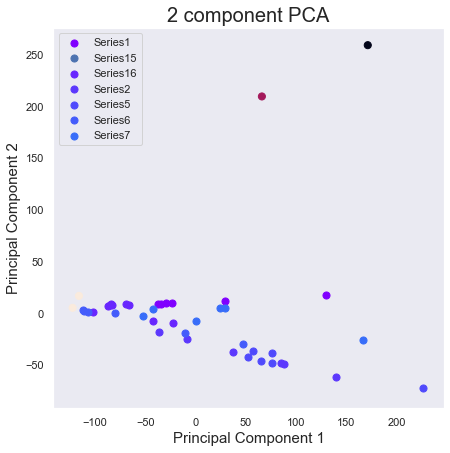

In [188]:
from matplotlib import cm

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = np.unique(y)
colors = cm.rainbow(np.linspace(0, 1, len(y)))#gist_ncar 
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Z-score
z = np.abs(stats.zscore(x))
print(z)
z.shape

In [189]:
threshold = 3
print(len(np.where(z.T > 3)[1]))
mask = (z[:, 0] > 3) & (z[:, 1] > 3)
z[mask]

18242


/Users/ali.kishk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


array([], shape=(0, 21797), dtype=float64)

In [190]:
x[(z < 3).all(axis=1),:]

/Users/ali.kishk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


array([], shape=(0, 21797), dtype=float64)

[Text(0, 0, 'Series1_NHBE_Mock_1'),
 Text(0, 0, 'Series1_NHBE_Mock_2'),
 Text(0, 0, 'Series1_NHBE_Mock_3'),
 Text(0, 0, 'Series1_NHBE_SARS-CoV-2_1'),
 Text(0, 0, 'Series1_NHBE_SARS-CoV-2_2'),
 Text(0, 0, 'Series1_NHBE_SARS-CoV-2_3'),
 Text(0, 0, 'Series2_A549_Mock_1'),
 Text(0, 0, 'Series2_A549_Mock_2'),
 Text(0, 0, 'Series2_A549_Mock_3'),
 Text(0, 0, 'Series2_A549_SARS-CoV-2_1'),
 Text(0, 0, 'Series2_A549_SARS-CoV-2_2'),
 Text(0, 0, 'Series2_A549_SARS-CoV-2_3'),
 Text(0, 0, 'Series5_A549_Mock_1'),
 Text(0, 0, 'Series5_A549_Mock_2'),
 Text(0, 0, 'Series5_A549_Mock_3'),
 Text(0, 0, 'Series5_A549_SARS-CoV-2_1'),
 Text(0, 0, 'Series5_A549_SARS-CoV-2_2'),
 Text(0, 0, 'Series5_A549_SARS-CoV-2_3'),
 Text(0, 0, 'Series6_A549-ACE2_Mock_1'),
 Text(0, 0, 'Series6_A549-ACE2_Mock_2'),
 Text(0, 0, 'Series6_A549-ACE2_Mock_3'),
 Text(0, 0, 'Series6_A549-ACE2_SARS-CoV-2_1'),
 Text(0, 0, 'Series6_A549-ACE2_SARS-CoV-2_2'),
 Text(0, 0, 'Series6_A549-ACE2_SARS-CoV-2_3'),
 Text(0, 0, 'Series7_Calu3_Mock_1'

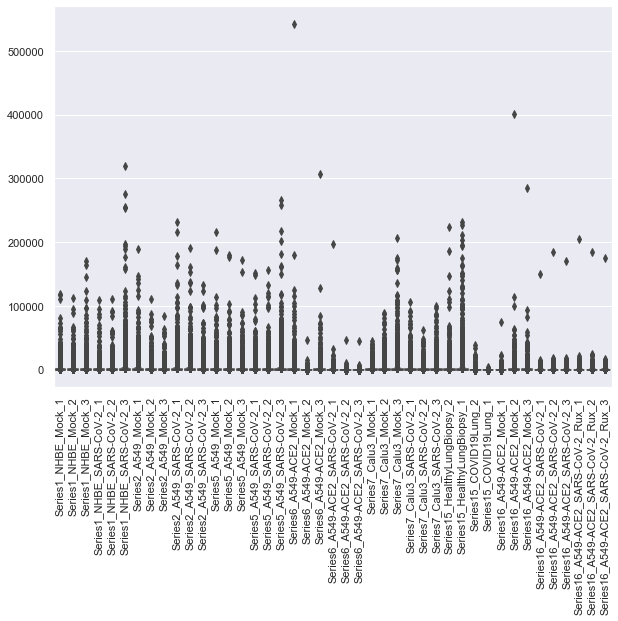

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
ax = sns.boxplot(data=counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [192]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(counts.T)
list(clusters).count(-1)

43

In [193]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [194]:
from sklearn.ensemble import IsolationForest
import numpy as np
np.random.seed(1)
clf = IsolationForest( behaviour = 'new', max_samples=6, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(counts.T)
preds

array([ 1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1])

In [195]:
counts.columns[preds==-1]

Index(['Series1_NHBE_Mock_3', 'Series1_NHBE_SARS-CoV-2_3',
       'Series2_A549_Mock_1', 'Series2_A549_SARS-CoV-2_1',
       'Series2_A549_SARS-CoV-2_2', 'Series5_A549_SARS-CoV-2_3',
       'Series7_Calu3_Mock_3', 'Series7_Calu3_SARS-CoV-2_1',
       'Series7_Calu3_SARS-CoV-2_3', 'Series15_HealthyLungBiopsy_2',
       'Series15_HealthyLungBiopsy_1'],
      dtype='object')